# Importing the libraries

In [915]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [916]:
bike= pd.read_csv("day.csv")

In [917]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [918]:
bike.shape

(731, 16)

In [919]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [920]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Observations**
   
- we loaded the dataset of day data.
- Dataset contains 731 rows
- Dataset contains 16 columns
- This dataset does not have null values,hence null value handling will not be done as a part of this project.

<Axes: >

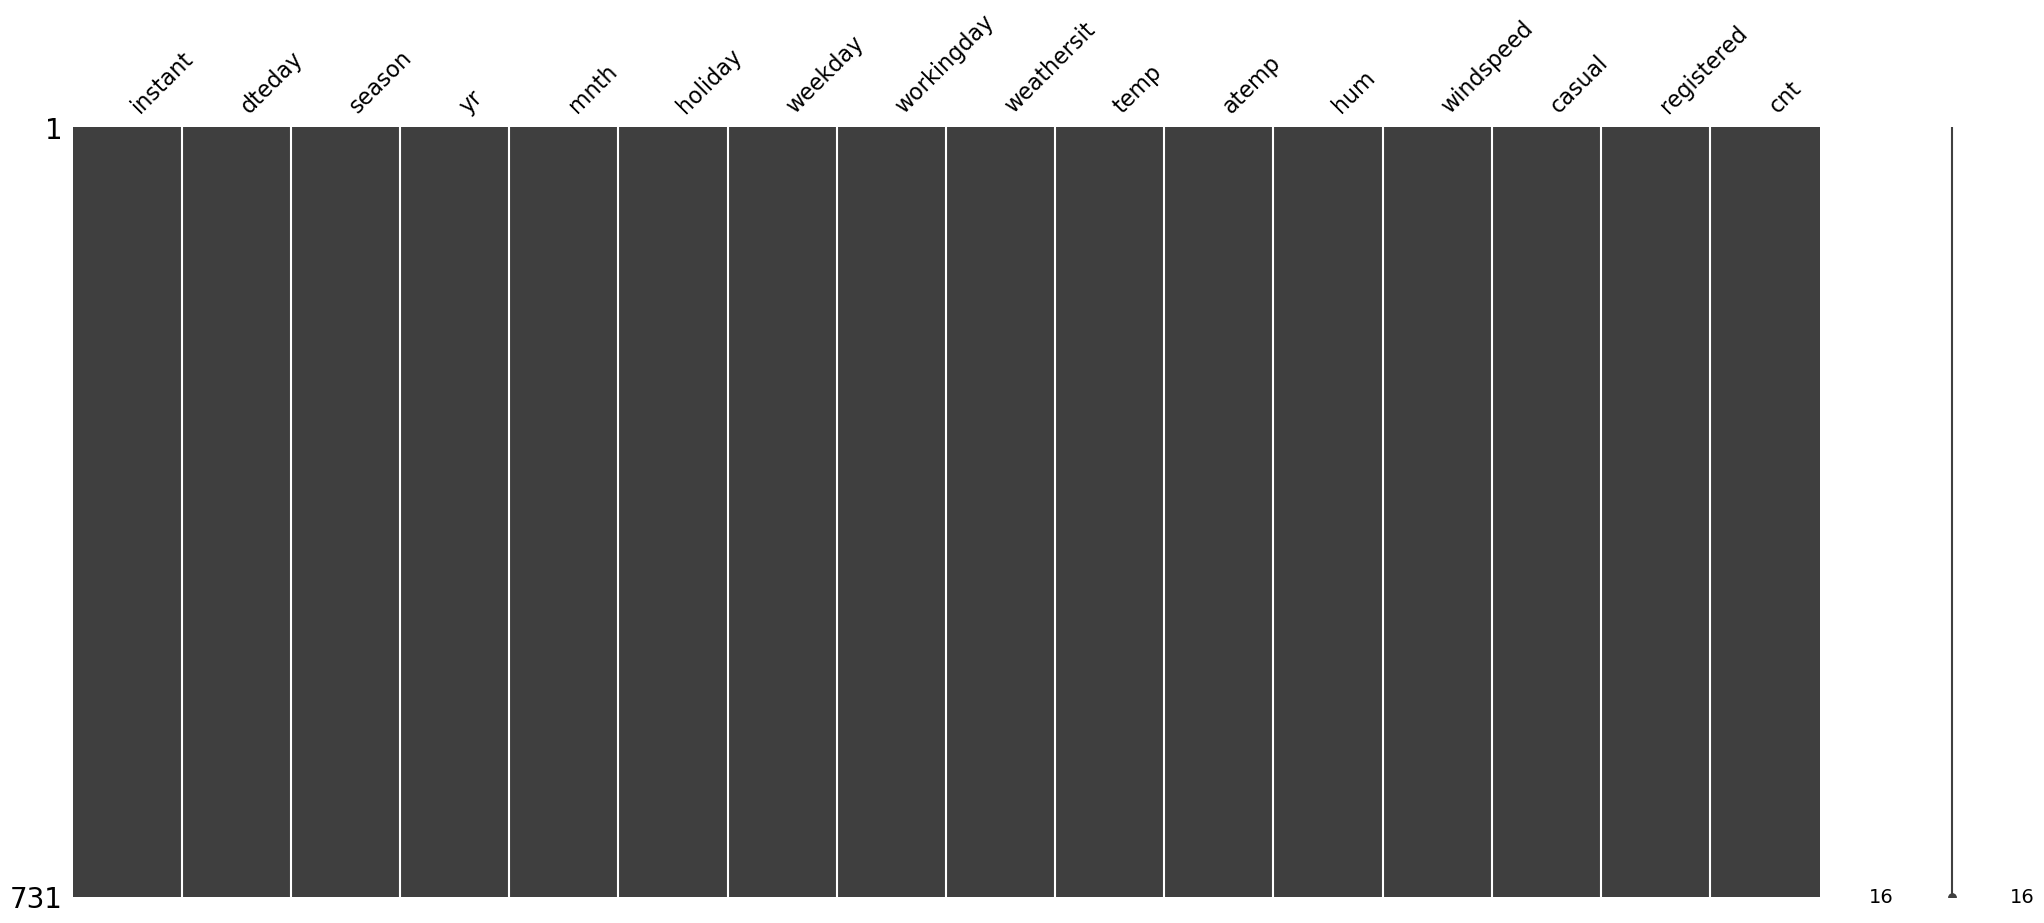

In [921]:
import missingno as mn
mn.matrix(bike)

In [922]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Observations**

- Missingno used to represent missing values as not a number.
- We describe the dataset of bike here.

## Attribute information
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if neither weekend nor holiday, it is 1; otherwise 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


## Pre-processing

In [923]:
bike['dteday'].dtype

dtype('O')

In [924]:
bike['dteday'] =  pd.to_datetime(bike['dteday'],format='%Y-%m-%d')
bike['dteday'].dtype
#datetime64[ns]

dtype('<M8[ns]')

**Observations**

- DatetimeIndex is a type of index that is specifically designed to work with datetime values.
- It is commonly used to index and organize time series data in pandas

In [925]:
bike['year'] = pd.DatetimeIndex(bike['dteday']).year
bike['month'] = pd.DatetimeIndex(bike['dteday']).month

In [926]:
# Dropping the columns as we have extracted the correct year and month from the date.
bike.drop(['yr','mnth'],axis=1,inplace=True)

In [927]:
# Dropping the dteday,instant columns.(unwanted)
# We are going to prediction of daily bike rental count based on the environmental and seasonal settings.so we are dropping casual and registered columns too.
bike.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [928]:
#Dropping the variable holiday as the workingday column covers enough information that is required.
#workingday : if neither weekend nor holiday, it is 1; otherwise 0.(holiday comes under 0)
bike.drop('holiday',axis=1,inplace=True)

In [929]:
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,985,2011,1
1,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801,2011,1
2,1,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,2011,1
3,1,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,2011,1
4,1,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,2011,1


**Observations**

- We drop the columns yr and mnth as we have extracted the correct year and month from the date.
- We here drop the dteday and instant columns as thes columns are unwanted.
- We are going to predict the daily bike rental cost based on environmental and seasonal settings.so we are dropping 
  casual and registered columns too
- We will drop variable holiday as the workingday column cover enough information that is required.

In [930]:
#for better understanding
year = {2011:1,2012:0}
bike['year'] = bike['year'].map(year)

In [931]:
#for better understanding
season = {1:'winter',2:'spring',3:'summer',4:'fall'}
bike['season'] = bike['season'].map(season)

In [932]:
#for better understanding
workingday = {1:'workingday',0:'holiday'}
bike['workingday']=bike['workingday'].map(workingday)

In [933]:
#for better understanding
weathersit = {1:'clear',2:'mist',3:'snow',4:'rain'}
bike['weathersit']=bike['weathersit'].map(weathersit)

In [934]:
#for better understanding
month = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
bike['month']=bike['month'].map(month)

In [935]:
#for better understanding
week = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
bike['weekday']=bike['weekday'].map(week)

In [936]:
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,winter,Sunday,holiday,mist,0.344167,0.363625,0.805833,0.160446,985,1,January
1,winter,Monday,holiday,mist,0.363478,0.353739,0.696087,0.248539,801,1,January
2,winter,Tuesday,workingday,clear,0.196364,0.189405,0.437273,0.248309,1349,1,January
3,winter,Wednesday,workingday,clear,0.200000,0.212122,0.590435,0.160296,1562,1,January
4,winter,Thursday,workingday,clear,0.226957,0.229270,0.436957,0.186900,1600,1,January


**Observations**

- Transforming the weathersit features into clear ,mist,snow and rain.
- Transforming the month features in jan,feb,mar,Apr,May,jun,jul,Aug,Sep,Oct,Nov,Dec
- Transforming week features into Mon, Tue,wed,thu,fri,sat
- Transforming working day into Workingday and holiday

## Data exploration

<Axes: xlabel='season', ylabel='cnt'>

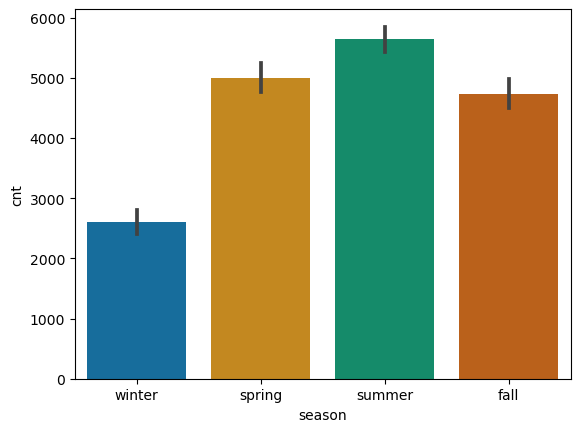

In [937]:
sns.barplot(x='season',y='cnt',data=bike,palette='colorblind')

**Observations**

- Summer is found to be a longest season ,followed by spring ,followed by fall, shortest season is Winter.
- we took y axis as count and x axis as season

<Axes: xlabel='weekday', ylabel='cnt'>

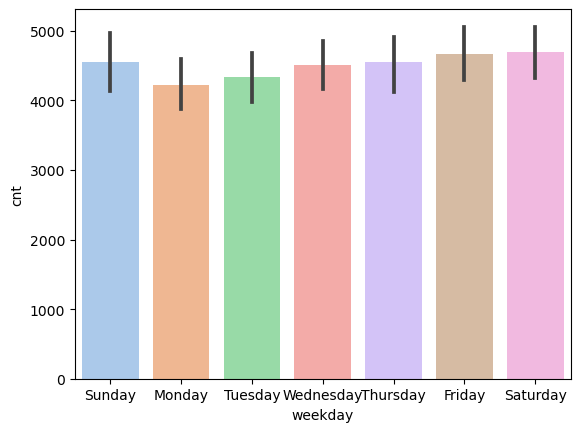

In [938]:
sns.barplot(x='weekday',y='cnt',data=bike,palette='pastel')

**Observations**

- According to the day dataset the bike rental is more on sunday , followed by Sat and friday ,followed by thursday, followed     by wed, followed by tuesday, very less on monday.
- We used in X-axis as weekday ,and in y-axis count

<Axes: xlabel='workingday', ylabel='cnt'>

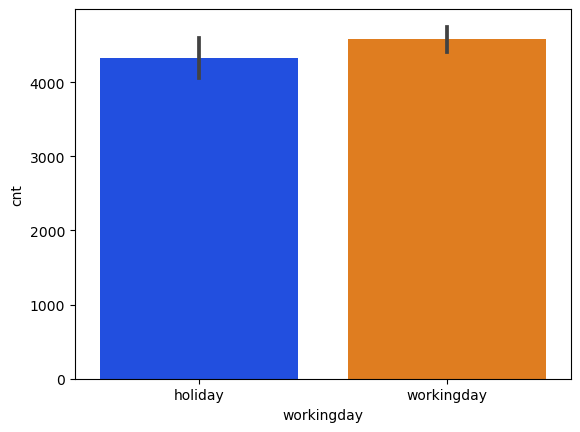

In [939]:
sns.barplot(x='workingday',y='cnt',data=bike,palette='bright')

**Observations**

- In above mentioned barplot,if we consider the holiday and the working day bar plot,we can see use of bikes in working days is more when compared to holidays.
- we took y-axis as count and x-axis as workingday

<Axes: xlabel='weathersit', ylabel='cnt'>

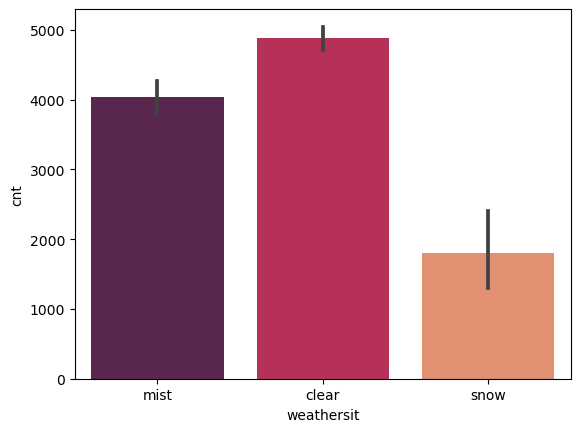

In [940]:
sns.barplot(x='weathersit',y='cnt',data=bike,palette='rocket')

**Observations**

- Weathersit shows three type of weathers.
- From this analysis we can say that weather is clear for both of the days,followed by mist, and the very less the snow as       occured.
- In y-axis we used count and in x-axis we used weathersit. 

<Axes: xlabel='year', ylabel='cnt'>

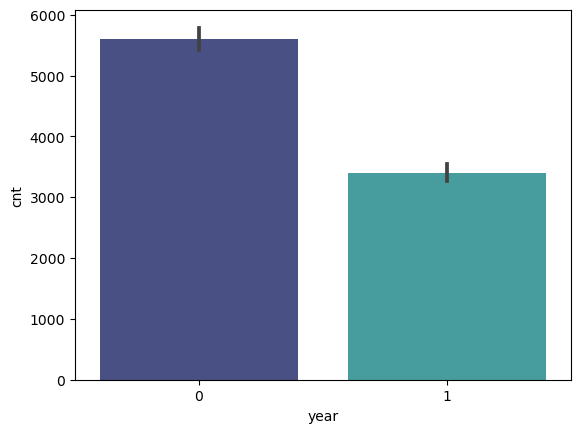

In [941]:
sns.barplot(x='year',y='cnt',data=bike,palette='mako')

**Observations**

- By looking into this graph we can say that the bike rental is more in the year 2012 than in the year 2011.
- In the y-axis we used count and in the x-axis we used year.


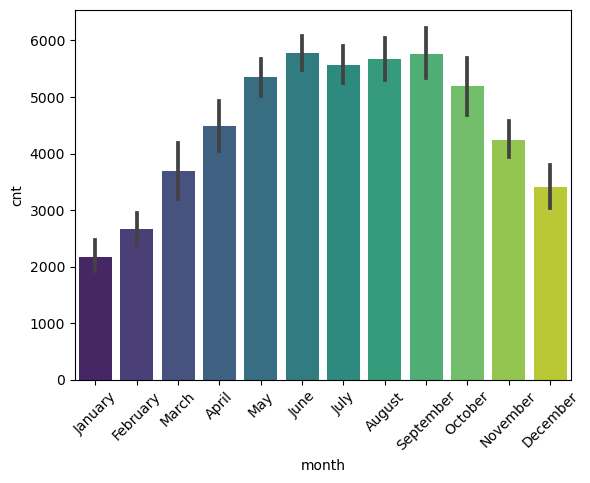

In [942]:
sns.barplot(x='month',y='cnt',data=bike,palette='viridis')
plt.xticks(rotation=45)
plt.show()

**Observations**

- By looking at the graph of month we can say that , in the month of June,Sep,Aug display highest demand trend followed by the months of Jul,may,oct. This effectively defines a six month period from may till octoberthat can be classified as high demand period.
- In the month of Jan ,feb have very low demand.
- IN y-axis we used count , for x-axis we used month 


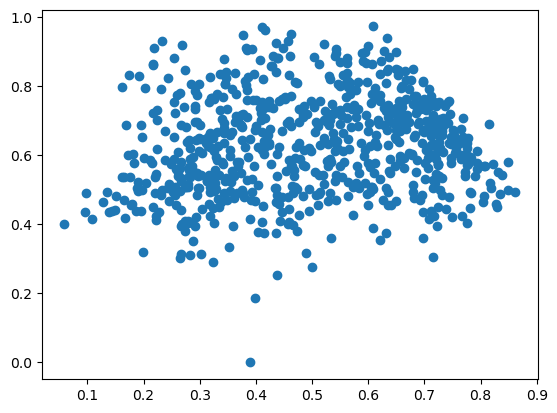

In [882]:
plt.scatter('temp','hum',data=bike)

<Axes: xlabel='temp', ylabel='atemp'>

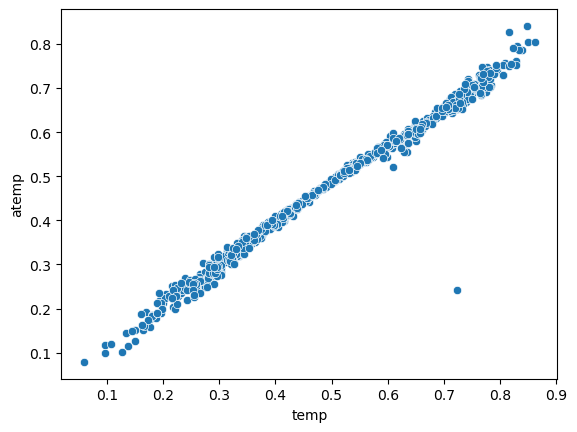

In [883]:
sns.scatterplot(x='temp',y='atemp',data=bike)

<Axes: >

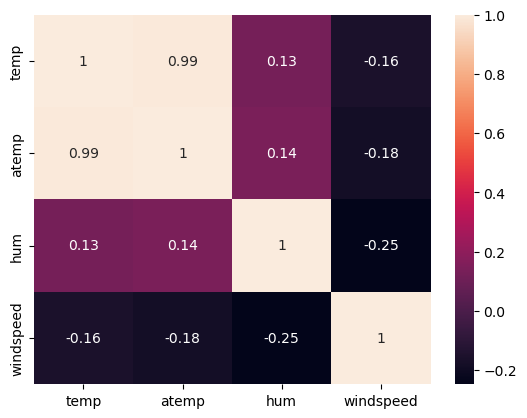

In [884]:
data= bike[['temp','atemp','hum','windspeed']]
sns.heatmap(data.corr(),annot=True)

**Observations**

- A correlation matrix fror the numerical features of the dataset of bike rental has most promising variables as temp.
- We can also see the value of correlation is very strong for both atemp and temp

In [885]:
#It is observed that atemp and temp are highly correlated and one can be dropped to avoid multicollinearity
bike.drop('atemp',axis=1,inplace=True)

**Observations**

- To avoid collinearity and to reduce the dimensionality and model complexity of the predictive model we drop the variable atemp.

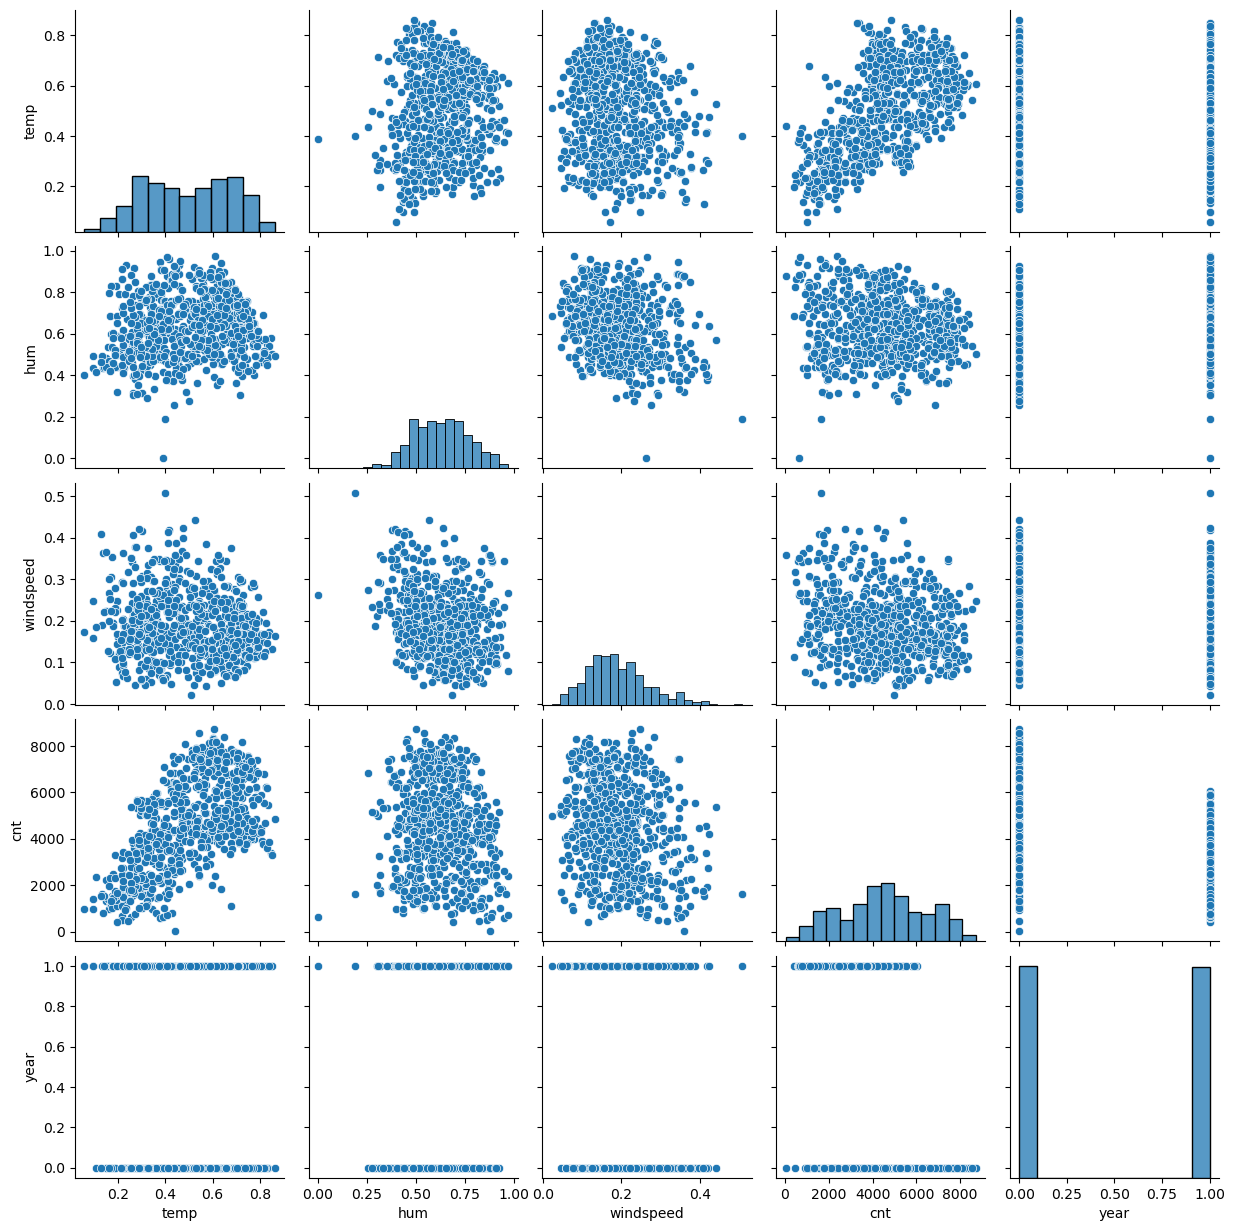

In [886]:
sns.pairplot(bike)

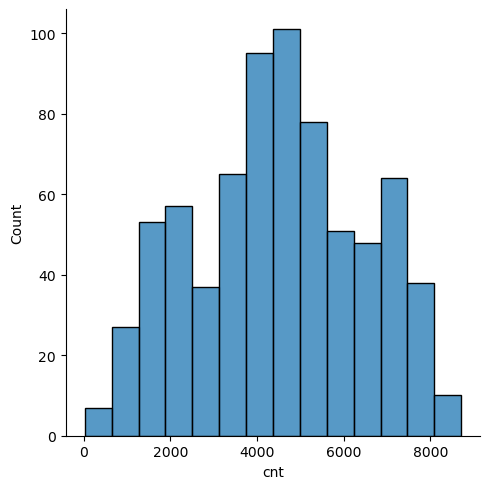

In [887]:
sns.displot(bike['cnt'])

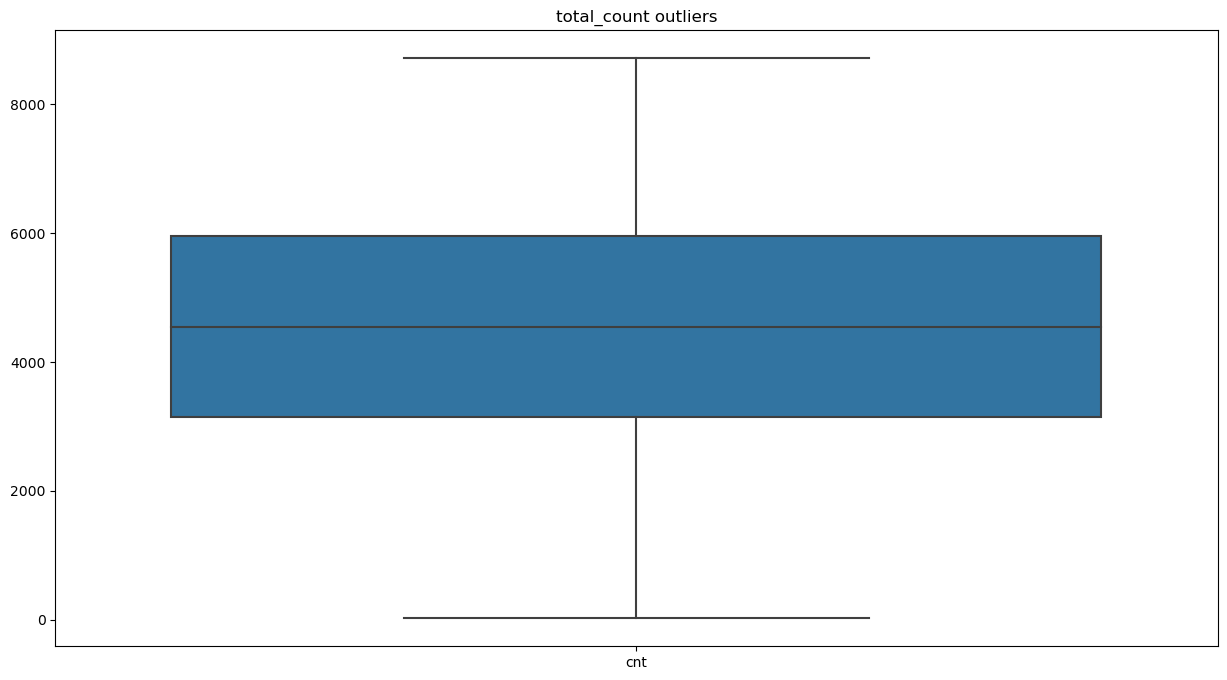

In [888]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=bike[['cnt']])
ax.set_title('total_count outliers')
plt.show()

**Observations**

- From the box plot, we can observed that no outliers are present in total_count variable.

In [889]:
seasons = pd.get_dummies(bike['season'],drop_first=True)

working_day = pd.get_dummies(bike['workingday'],drop_first=True)

weather= pd.get_dummies(bike['weathersit'],drop_first=True)

month= pd.get_dummies(bike['month'],drop_first=True)

week_day= pd.get_dummies(bike['weekday'],drop_first=True)

**Observations**

- Getting dummies refers to the process of converting categorical variables into numerical representation, often using a         technique called one-hot encoding.
- Machine learning algorithms typically work with numerical data. 
- By converting categorical variables into numerical form, we     enable the algorithms to process and analyze the data           effectively.

In [890]:
bike= pd.concat([bike,seasons,working_day,weather,month,week_day],axis=1)

In [891]:
bike.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,winter,Sunday,holiday,mist,0.344167,0.805833,0.160446,985,1,January,...,0,0,0,0,0,0,1,0,0,0
1,winter,Monday,holiday,mist,0.363478,0.696087,0.248539,801,1,January,...,0,0,0,0,1,0,0,0,0,0
2,winter,Tuesday,workingday,clear,0.196364,0.437273,0.248309,1349,1,January,...,0,0,0,0,0,0,0,0,1,0
3,winter,Wednesday,workingday,clear,0.200000,0.590435,0.160296,1562,1,January,...,0,0,0,0,0,0,0,0,0,1
4,winter,Thursday,workingday,clear,0.226957,0.436957,0.186900,1600,1,January,...,0,0,0,0,0,0,0,1,0,0


In [892]:
# Dropping the categorical variables as they are already dummy-encoded.

bike.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [893]:
bike.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,mist,snow,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.344167,0.805833,0.160446,985,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0.363478,0.696087,0.248539,801,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.196364,0.437273,0.248309,1349,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.200000,0.590435,0.160296,1562,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.226957,0.436957,0.186900,1600,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


**Observations**

- We concate the seasons,weekday,workingday,weather,month.
- After concating we got 5 rows and 33 columns.
- We drop the categorical variables as they are already dummy-encoded.
- After dropping we have 5 rows and 27 columns in bike data. 

## Importing libraries

In [894]:
#load the required libraries
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

## Splitting the Features and Target

In [895]:
y = bike.pop('cnt')

**Observations**

- As we have a target variable available with us and hence it is a supervised learning problem.

## Splitting the dataset into Training data and Testing data

In [896]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(511, 26) (220, 26) (511,) (220,)


**Observations**

- Adding the number of rows of test and train set comes to exactly 731 which matches the row count of our bikes.Hence rows have been properly divided into test and train.
- Number of columns is 26 which matches the columns of our bikes dataset.

## Linear Regression 

In [897]:
lr_model=linear_model.LinearRegression()

**Observations**

- Given target variable(cnt) is continuous and hence,this problem qualifies to be regression problem

## Linear Regression Model Training

In [898]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [899]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)

Accuracy of the model : 0.8387349804427819


**Observations**

- We found out the accuracy of the train  model using linear regression. 

###  Testing Linear Regression Model 

In [900]:
lr_pred=lr_model.predict(X_test)

In [901]:
lr=lr_model.score(X_test,y_test)
print('Accuracy of the model :',lr)

Accuracy of the model : 0.8482669096242574


**Observations**

- Here we testing the acurracy of the test model using linear regression. And we can see that the accuracy of both test and train are almost same.

## Evaluation

In [902]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8047660135619551


**Observations**

- The impact on R squared scores is minimal 
- the averagre R scores is also same as test and train.

# Decision tree regressor

In [903]:
from sklearn.tree import DecisionTreeRegressor
decision=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

## Decision tree regressor Model Training

In [904]:
decision.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [905]:
#Accuracy score of the model
decision_score=decision.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.8666461558897081


**Observations**

- We also test the accuracy by splitting the training data using decision tree regression. 
- Linear tree regressor have  maximum  10 leaf node 

###  Decision tree regressor Model Testing

In [906]:
decision_pred=decision.predict(X_test)

In [907]:
decision=decision.score(X_test,y_test)
print('Accuracy of the model :',lr)

Accuracy of the model : 0.8482669096242574


**Observations**

- We test the accuracy by predicting the test value using decision tree regressor. 

## Random Forest

In [908]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200)

## Decision tree regressor Model Training

In [909]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [910]:
#accuracy of the model
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.978670979795277


**Observations**

- Here we performed a random forest regression for train data.
- The accuracy of train is same as all the R squared value.

###  Decision tree regressor Model Testing

In [911]:
rf_pred=rf.predict(X_test)

In [912]:
rf=rf.score(X_test,y_test)
print('Accuracy of the model :',rf)

Accuracy of the model : 0.8921211869989164


**Observations**

- We performed a random forest regression for Test data

# Conclusion and Future works

- Finally we can predict the accuracy of the model using random forest ,for this data set is the best way to accurately predict the influence of which attribute are more or less. Similarly we consider the train, test.And we first imported the all the necessary libraries like numpy,pandas,matplotlib,seborn. We predicted all the data in day dataset,as in that we got more bike rental in the year 2012. Like this we analysed the the data and visuilized the data , preprocessing of data is also done we also dropped instant and dateday as it is not useful. And we also done splitting test and train data. We had predicted and analyze the data successfully.

- There are many other alternatives for this problem,but the best one will be the python implementation.We can also use the other machine learning frameworks such as apache spark ML for highly distributed computation which will help in the utilization.This Spark ML can run kubernetes,Apache ,esos , Hadoop etc..